In [14]:
from tools import *
import time 


In [4]:
def map_images(folder_path, output_file='photo_map.html'):
    markers = []

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('jpg', 'jpeg')):
            full_path = os.path.join(folder_path, filename)
            gps = extract_gps_data(full_path)
            if gps:
                lat, lon, alt = gps
                popup = f"{filename}<br>Lat: {lat:.6f}<br>Lon: {lon:.6f}"
                if alt:
                    popup += f"<br>Altitude: {alt:.2f} m"
                markers.append((lat, lon, popup))

    if not markers:
        print("No images with valid GPS data found.")
        return

    # Create base map with neutral zoom; center doesn't matter because we'll use fit_bounds
    photo_map = folium.Map(location=[0, 0], zoom_start=2)

    bounds = []

    for lat, lon, popup in markers:
        folium.Marker([lat, lon], popup=popup).add_to(photo_map)
        bounds.append([lat, lon])

    # Fit map to the bounds of all markers (prevents zooming too far in)
    photo_map.fit_bounds(bounds)

    photo_map.save(output_file)
    print(f"Map saved to {output_file}")
    

In [5]:


map_images("/media/nathanansel/TOSHIBA EXT/A35/DCIM/Camera/")


Map saved to photo_map.html


In [23]:
import os
from PIL import Image
import piexif
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def is_in_europe(lat, lon):
    return (35 <= lat <= 71) and (-25 <= lon <= 45)

def map_images_europe_outline(folder_paths, output_file='europe_outline_dots.jpg'):
    if isinstance(folder_paths, str):
        folder_paths = [folder_paths]  # support single string input

    markers = []

    for folder_path in folder_paths:
        for filename in os.listdir(folder_path):
            if filename.lower().endswith(('jpg', 'jpeg')):
                full_path = os.path.join(folder_path, filename)
                gps = extract_gps_data(full_path)
                if gps:
                    lat, lon, alt = gps
                    if is_in_europe(lat, lon):
                        markers.append((lat, lon))

    if not markers:
        print("No images with valid GPS data in Europe.")
        return

    # Elegant figure
    fig = plt.figure(figsize=(10, 8), dpi=300)
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([-25, 45, 35, 71])

    # Add elegant outlines
    ax.add_feature(cfeature.BORDERS.with_scale('50m'), edgecolor='gray', linewidth=0.4)
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), edgecolor='gray', linewidth=0.4)

    # Optional: cleaner continent mask
    ax.add_feature(cfeature.LAND, facecolor='white', edgecolor='none')
    ax.add_feature(cfeature.OCEAN, facecolor='white', edgecolor='none')

    # Remove clutter
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['geo'].set_visible(False)
    ax.patch.set_facecolor('white')
    fig.patch.set_facecolor('white')

    # Plot dots with elegant color
    for lat, lon in markers:
        ax.plot(lon, lat, 'o', color='#d62728', markersize=0.5, transform=ccrs.PlateCarree(), alpha=0.8)

    plt.tight_layout()
    plt.savefig(output_file, bbox_inches='tight')
    plt.show()
    plt.close()

    print(f"Elegant dot-only map saved to {output_file}")


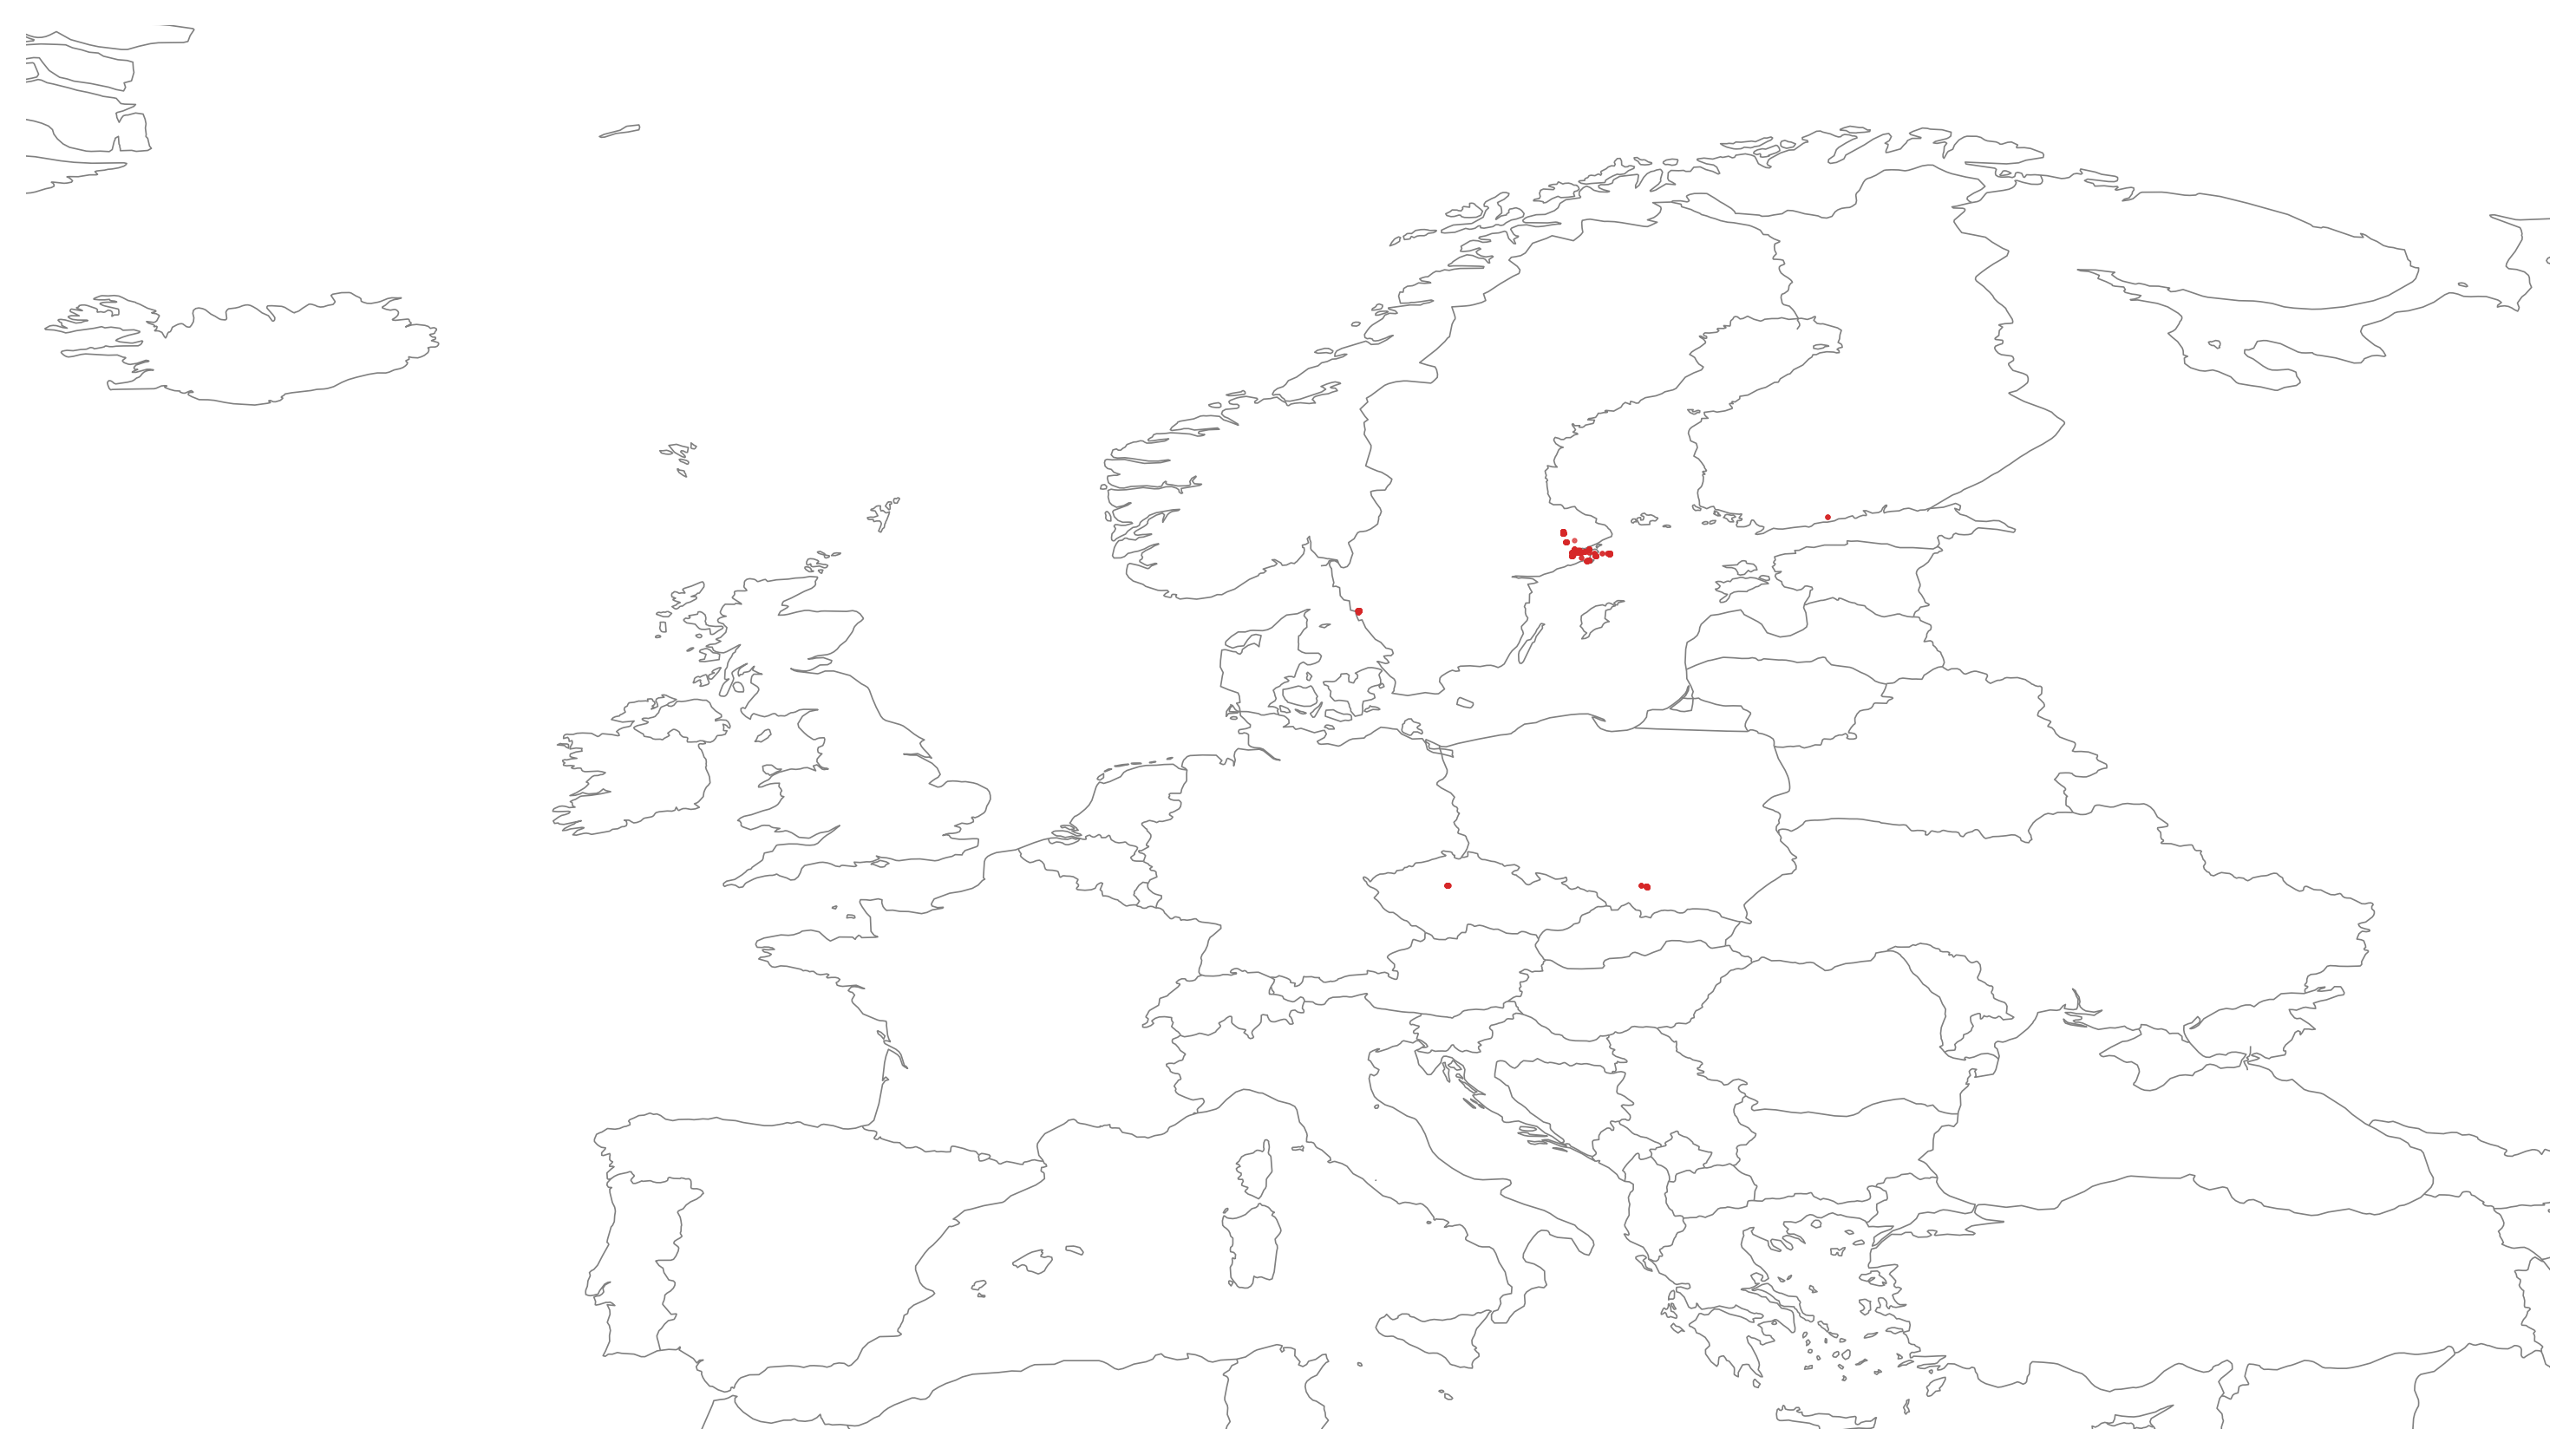

Elegant dot-only map saved to 1749617081.jpg


In [24]:
# map_images_europe_outline("/media/nathanansel/TOSHIBA EXT/A35/DCIM/Camera/")

map_images_europe_outline(
    folder_paths = [
        "/media/nathanansel/TOSHIBA EXT/TEMPBACKUP/Camera/", 
        "/media/nathanansel/TOSHIBA EXT/TEMPBACKUP/SD Camera/"
    ],
    output_file = f"{int(time.time())}.jpg"
)

In [17]:
round(time.time(), -1)

1749616780.0